## Weekly trends plot for different years
* No reampling is done for this case, we are directly using the ocean color 8 day datasets.
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 8
pref = 'df_chl_dist_out_OC_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_OC_8D_modisa.csv


,time,id,temp,var_lat,var_tmp,vn,var_lon,ve,lat,lon,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,NaN,0.000352,1000.000000,6.509875,0.000996,-6.823625,10.873656,67.351188,...,-2.001974,-0.001848,-0.012985,0.013562,-0.178561,-0.012938,-0.090897,44,1,519.077549
260,2002-11-09,10206,NaN,0.000984,1000.000000,1.562844,0.003551,-0.786375,11.155719,67.108219,...,-2.009126,-0.000120,-0.000894,0.021090,0.020181,-0.000842,-0.006259,45,2,544.277694
519,2002-11-17,10206,NaN,0.000691,1000.000000,0.728813,0.002426,-1.222031,11.179438,67.022562,...,-1.998155,0.000185,0.001371,0.022420,0.057419,0.001295,0.009600,46,3,553.600884
778,2002-11-25,10206,NaN,0.000877,1000.000000,2.751937,0.003086,-5.805906,11.310312,66.887437,...,-1.963044,0.000606,0.004389,0.024253,0.107016,0.004239,0.030722,48,5,568.418257
1037,2002-12-03,10206,NaN,0.001989,1000.000000,7.625781,0.008155,-13.705094,11.619656,66.202937,...,-1.863798,0.001832,0.012406,0.029594,0.238787,0.012821,0.086840,49,6,644.469466
1296,2002-12-11,10206,NaN,0.001419,1000.000000,6.657594,0.005590,-9.692125,12.094781,65.421156,...,-1.999938,-0.002467,-0.017018,0.010864,-0.244838,-0.017271,-0.119123,50,7,734.343511
1555,2002-12-19,10206,NaN,0.001140,1000.000000,4.556469,0.004192,-8.368125,12.434812,64.896875,...,-1.852240,0.002693,0.018462,0.033346,0.338339,0.018849,0.129236,51,8,796.212237
1814,2002-12-27,10206,NaN,0.000417,1000.000000,-1.765500,0.001212,-11.493313,12.549094,64.271031,...,-1.783050,0.001405,0.008649,0.027735,0.177034,0.009834,0.060541,52,9,865.389879
2073,2003-01-04,10206,NaN,0.000691,1000.000000,-5.715375,0.002190,-11.053437,12.280437,63.550156,...,-1.238337,0.015218,0.068089,0.087918,1.154049,0.106524,0.476624,1,11,938.950903


In [3]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002



 summary statistics of chl_rate_week for the year 2002 

count    45.000000
mean      0.007193
std       0.089912
min      -0.382744
25%      -0.016304
50%       0.003533
75%       0.019285
max       0.360003
Name: chl_rate_week, dtype: float64


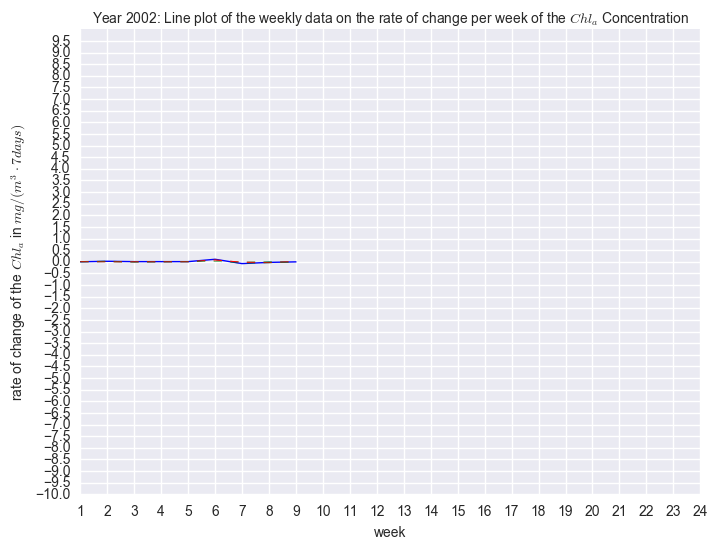

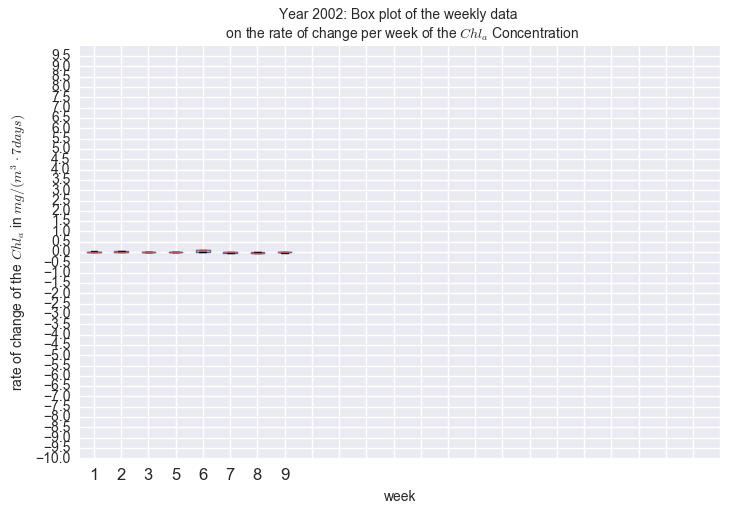


 summary statistics of chl_rate_week for the year 2003 

count    42.000000
mean     -0.012217
std       0.562858
min      -1.348533
25%      -0.085488
50%       0.005000
75%       0.074460
max       1.654371
Name: chl_rate_week, dtype: float64


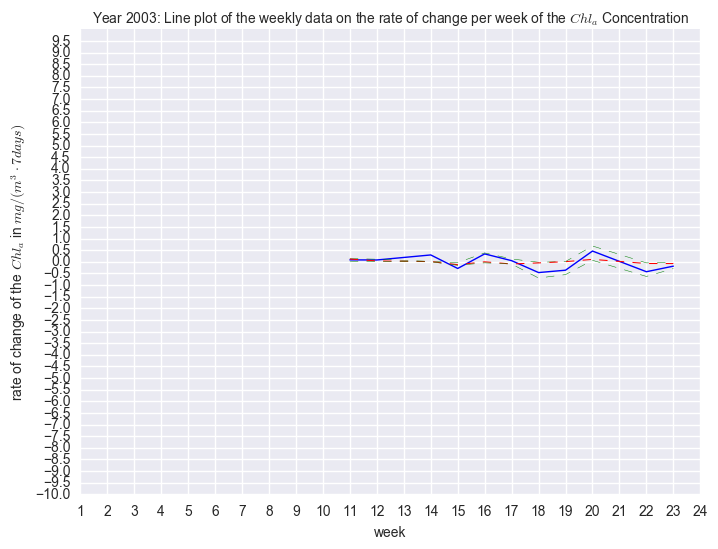

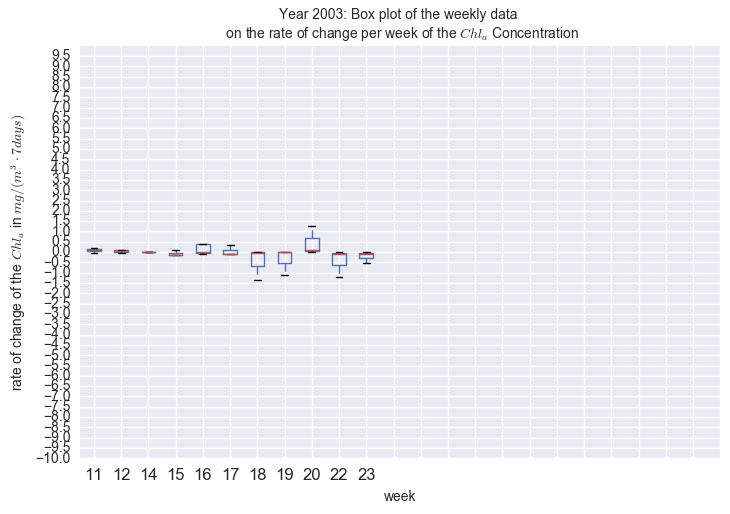


 summary statistics of chl_rate_week for the year 2004 

count    12.000000
mean      0.012543
std       0.047171
min      -0.071865
25%      -0.008972
50%       0.000219
75%       0.036668
max       0.100659
Name: chl_rate_week, dtype: float64


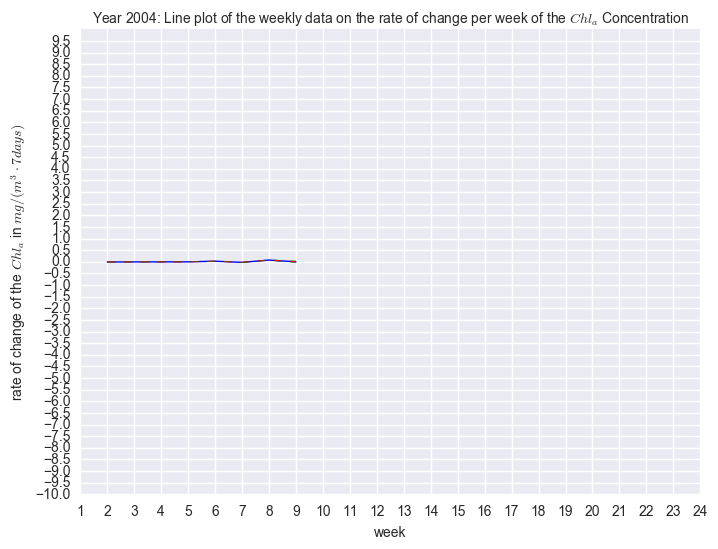

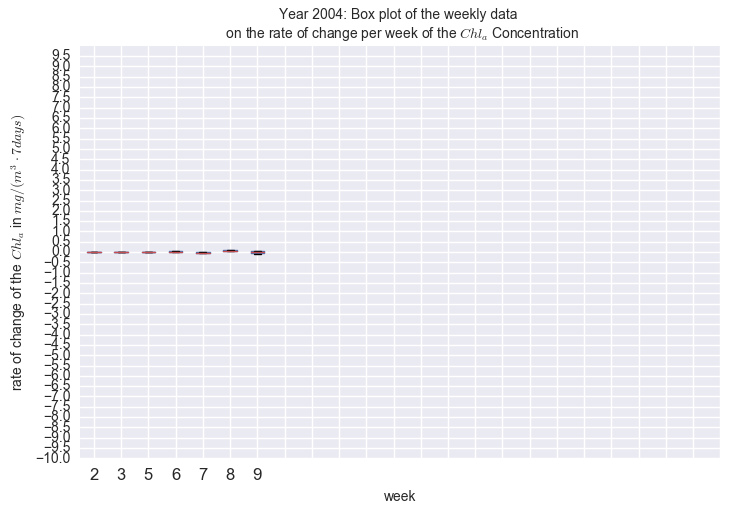


 summary statistics of chl_rate_week for the year 2005 

count    52.000000
mean      0.001395
std       0.096001
min      -0.288784
25%      -0.011939
50%       0.011187
75%       0.044616
max       0.320302
Name: chl_rate_week, dtype: float64


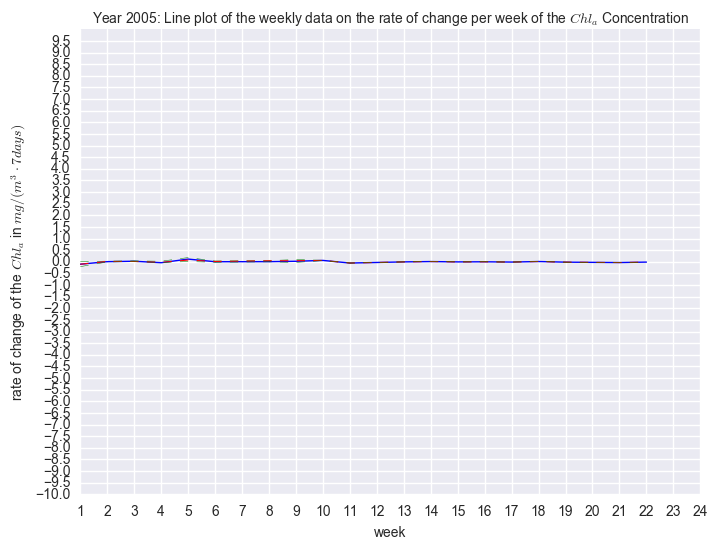

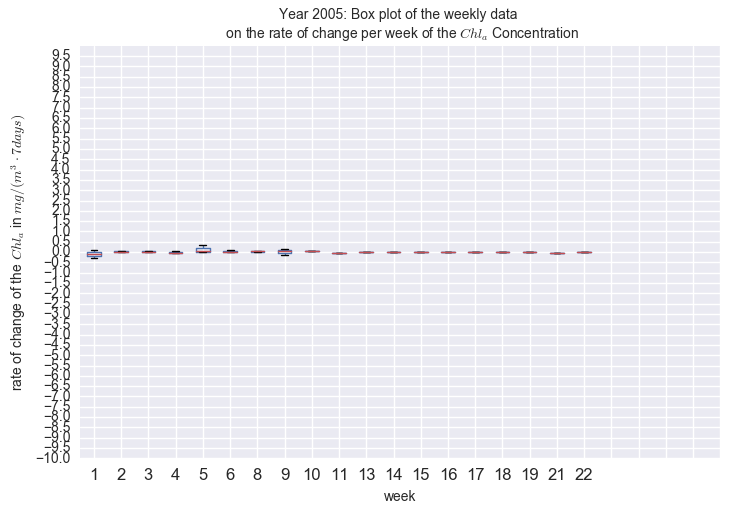


 summary statistics of chl_rate_week for the year 2006 

count    108.000000
mean      -0.001235
std        0.208780
min       -1.073614
25%       -0.045042
50%       -0.010641
75%        0.009952
max        1.209117
Name: chl_rate_week, dtype: float64


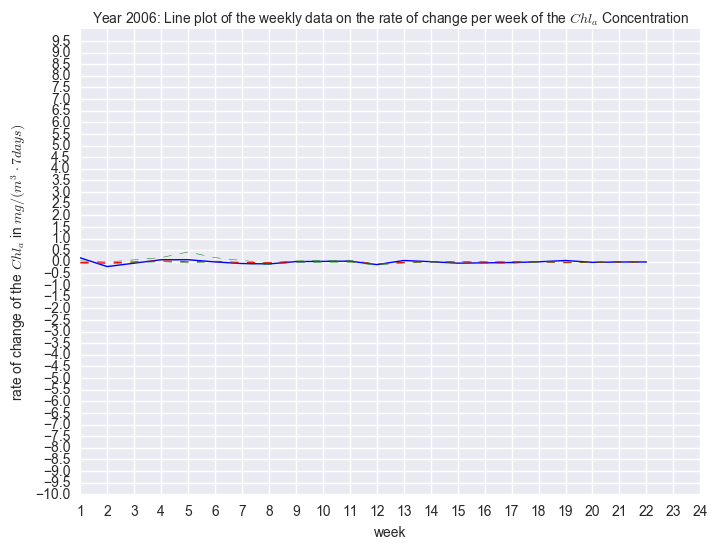

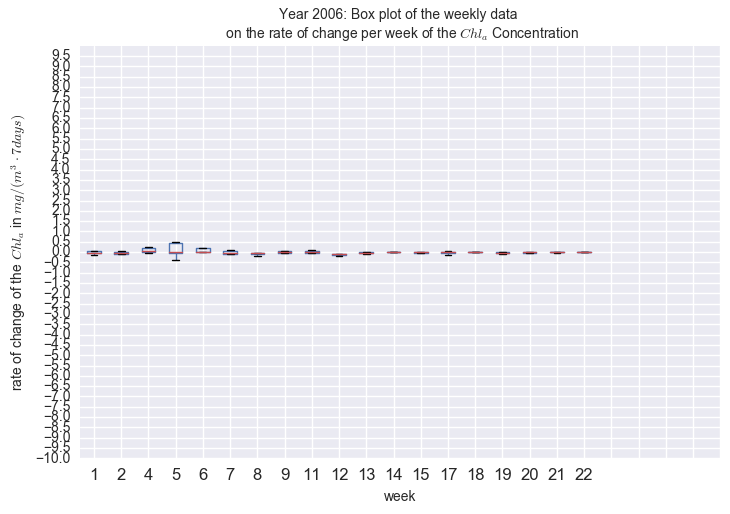


 summary statistics of chl_rate_week for the year 2007 

count    101.000000
mean       0.020263
std        0.099526
min       -0.158987
25%       -0.015842
50%        0.004553
75%        0.026788
max        0.689046
Name: chl_rate_week, dtype: float64


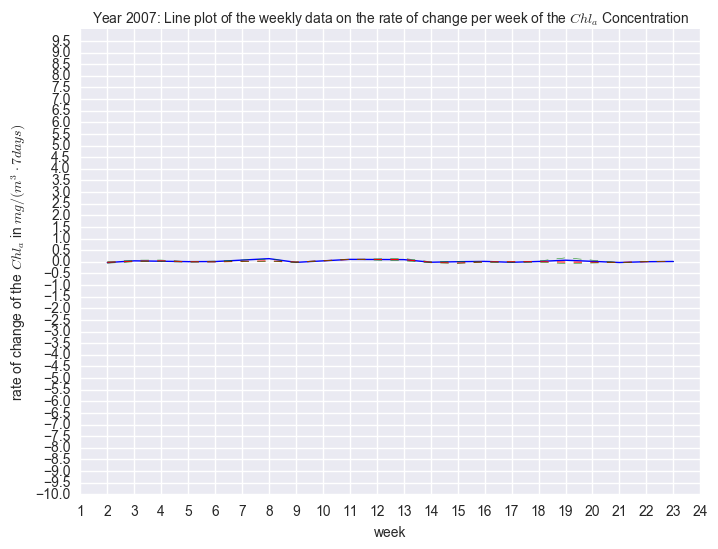

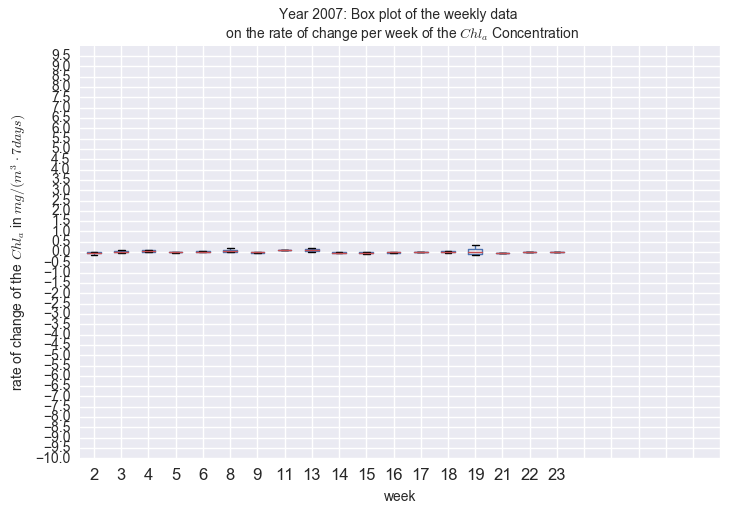


 summary statistics of chl_rate_week for the year 2008 

count    164.000000
mean      -0.267231
std        2.242144
min      -11.282684
25%       -0.032930
50%       -0.005816
75%        0.013276
max        9.149188
Name: chl_rate_week, dtype: float64


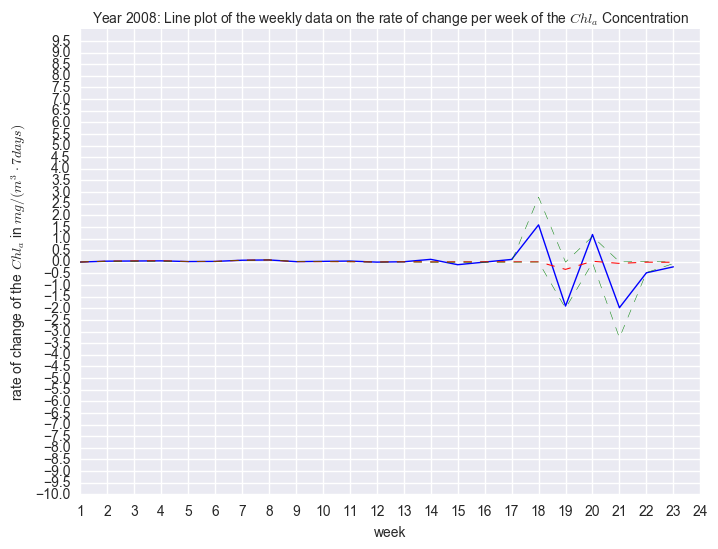

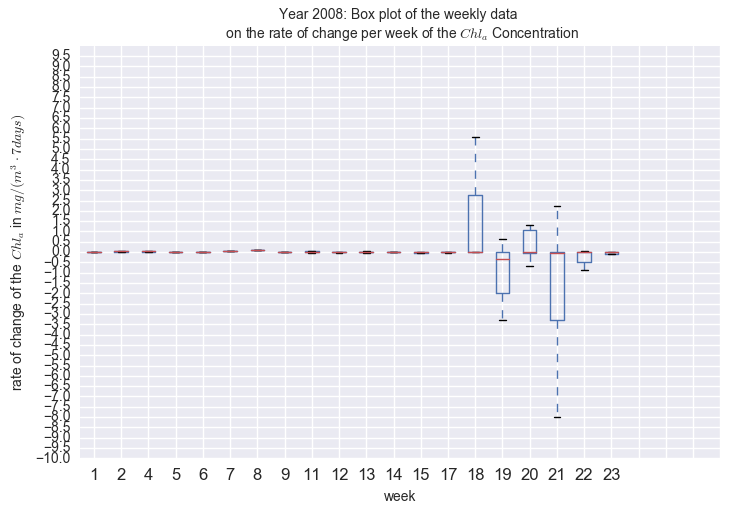


 summary statistics of chl_rate_week for the year 2009 

count    43.000000
mean     -0.011376
std       0.205353
min      -1.038915
25%      -0.011553
50%       0.003382
75%       0.016298
max       0.704537
Name: chl_rate_week, dtype: float64


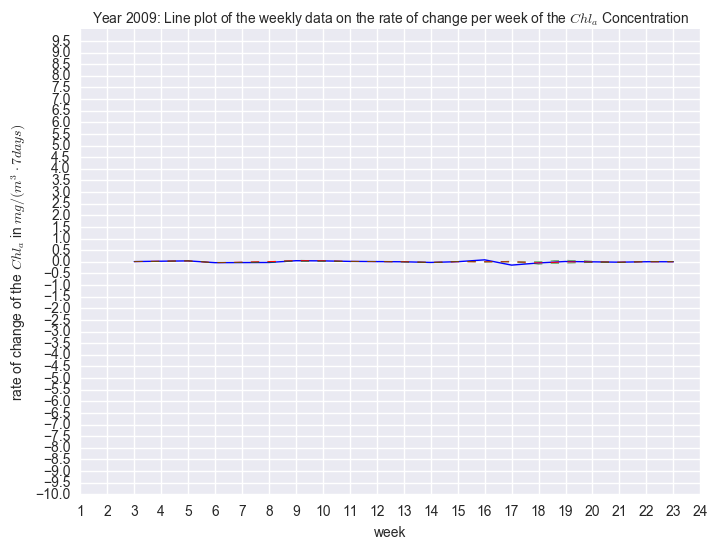

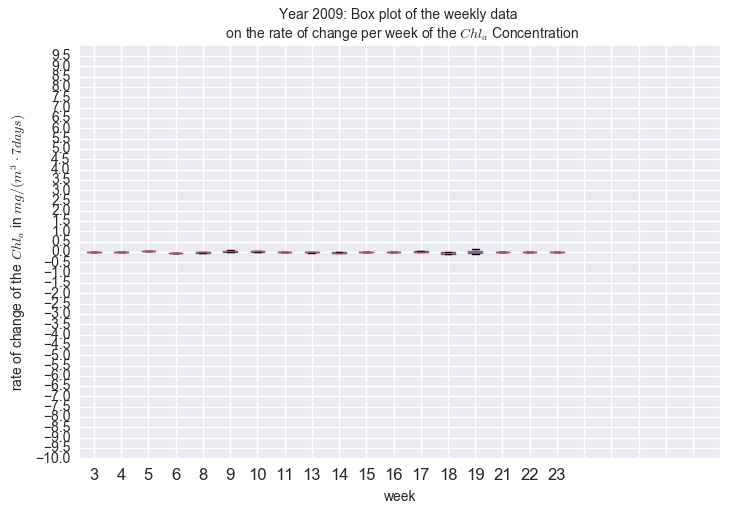


 summary statistics of chl_rate_week for the year 2010 

count    72.000000
mean     -0.009643
std       0.061495
min      -0.349300
25%      -0.022902
50%      -0.006200
75%       0.011392
max       0.192485
Name: chl_rate_week, dtype: float64


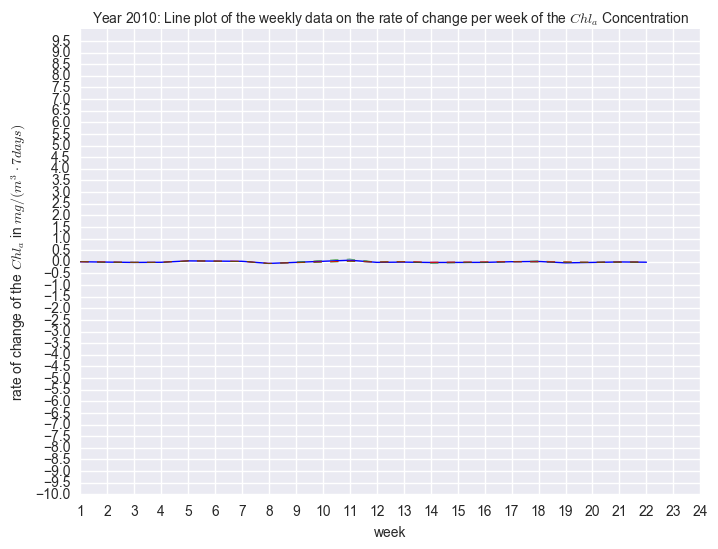

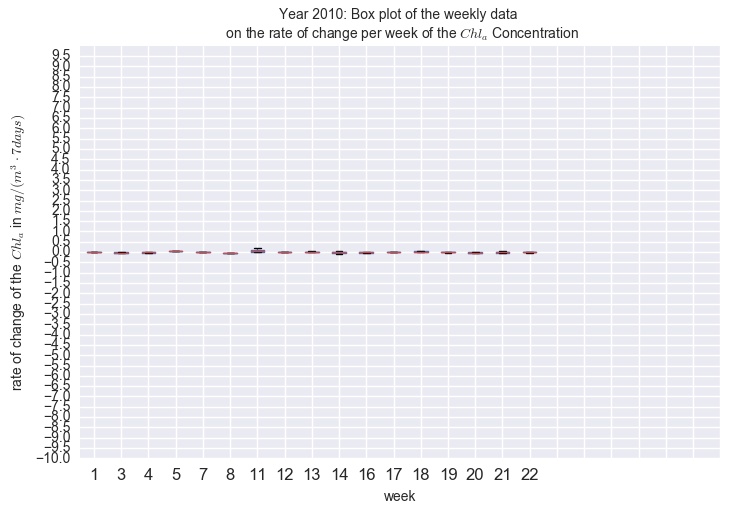


 summary statistics of chl_rate_week for the year 2011 

count    21.000000
mean     -0.001537
std       0.156353
min      -0.598967
25%      -0.017451
50%       0.031760
75%       0.059737
max       0.187121
Name: chl_rate_week, dtype: float64


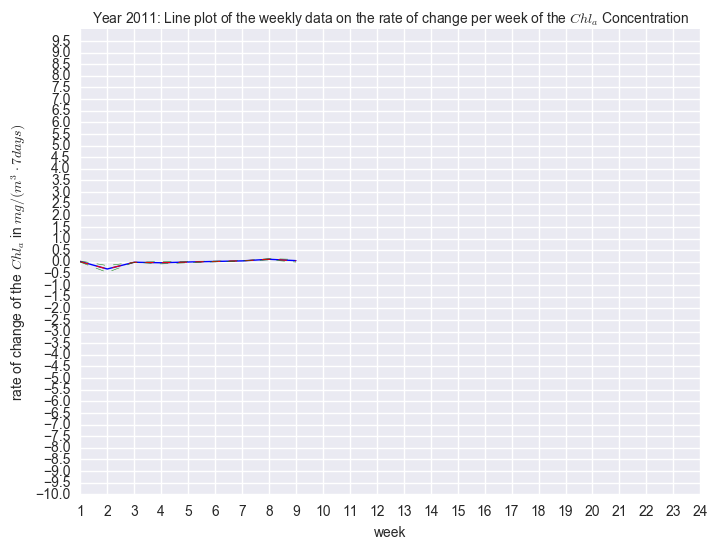

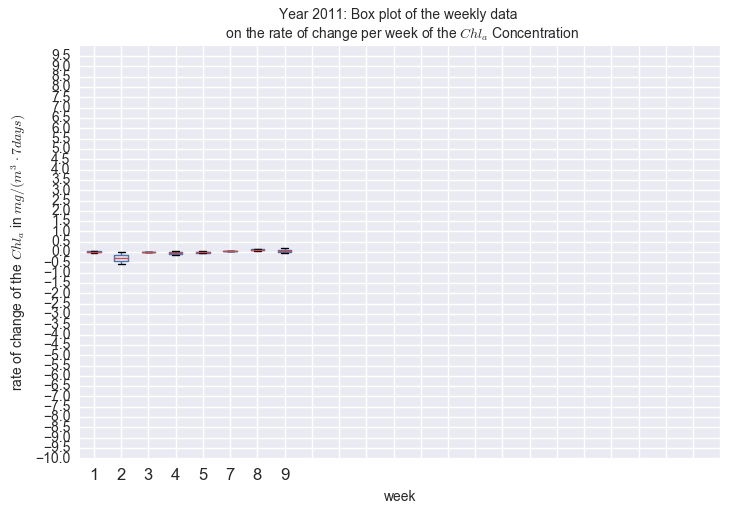


 summary statistics of chl_rate_week for the year 2012 

count    39.000000
mean      0.030538
std       0.557391
min      -1.411399
25%      -0.116740
50%       0.008265
75%       0.212498
max       1.246088
Name: chl_rate_week, dtype: float64


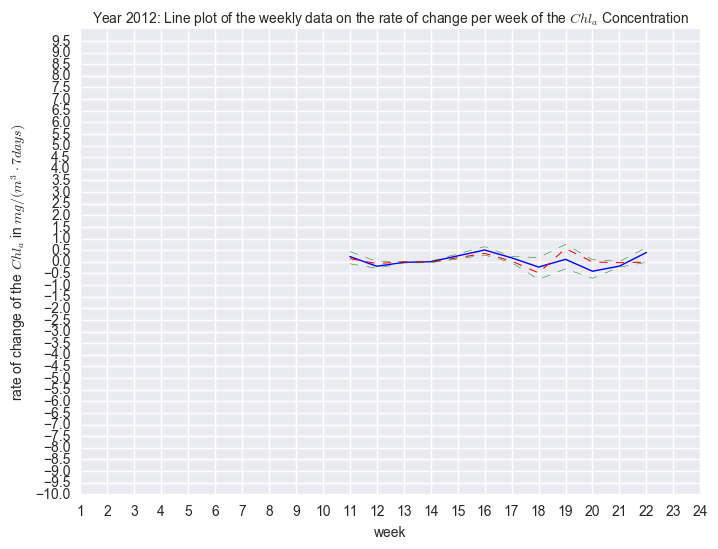

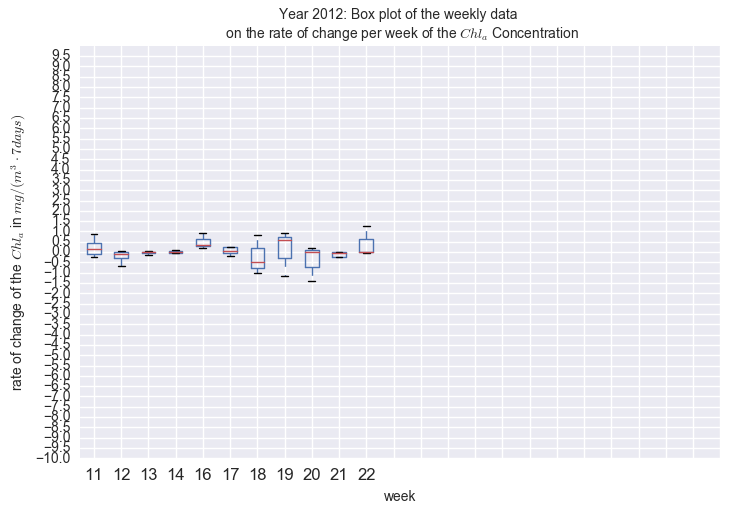


 summary statistics of chl_rate_week for the year 2013 

count    31.000000
mean      0.045952
std       0.339103
min      -0.192211
25%      -0.063384
50%      -0.013830
75%       0.043601
max       1.822601
Name: chl_rate_week, dtype: float64


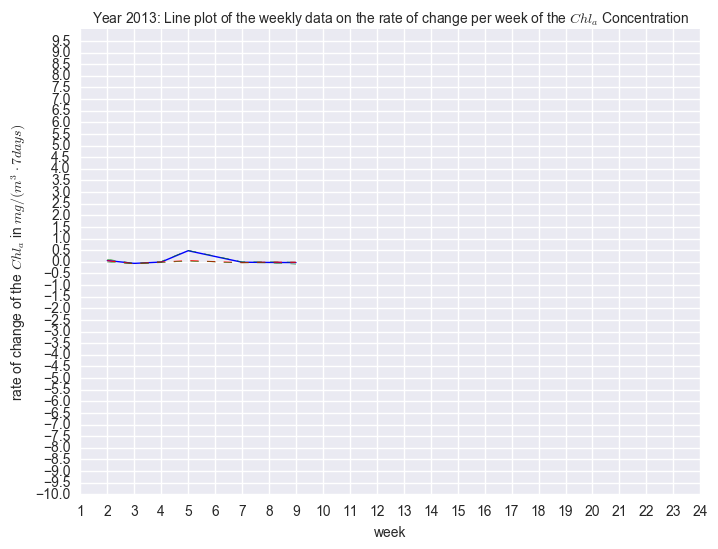

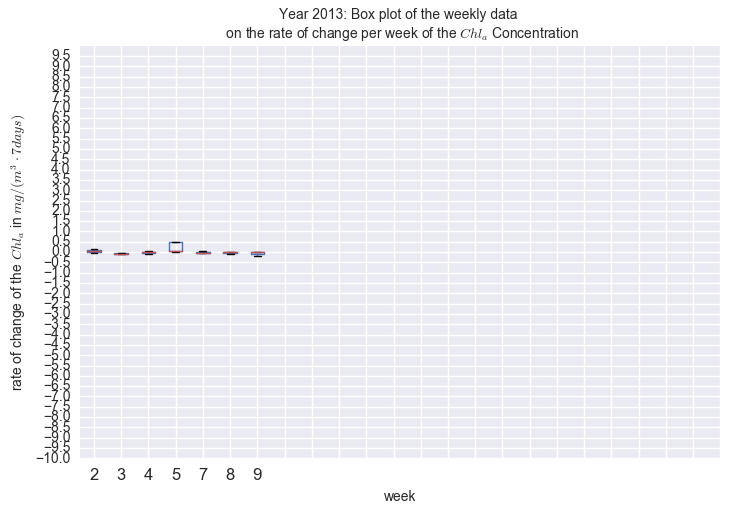


 summary statistics of chl_rate_week for the year 2014 

count    192.000000
mean       0.009153
std        2.211830
min      -20.801012
25%       -0.086144
50%       -0.005429
75%        0.085154
max       18.750057
Name: chl_rate_week, dtype: float64


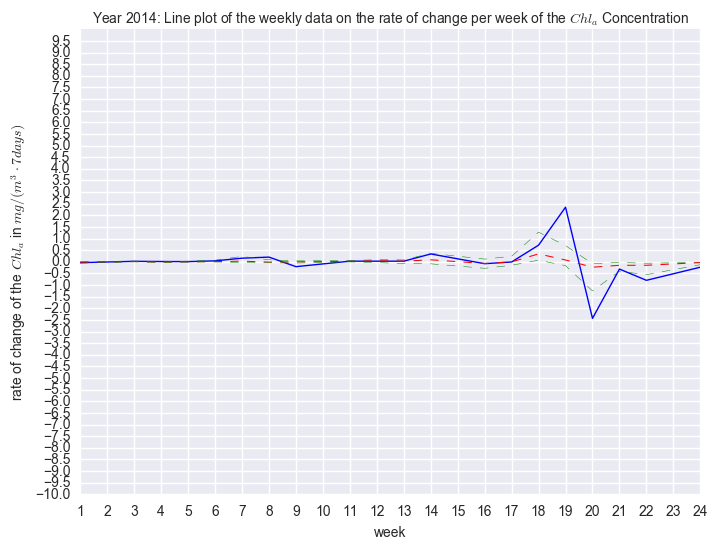

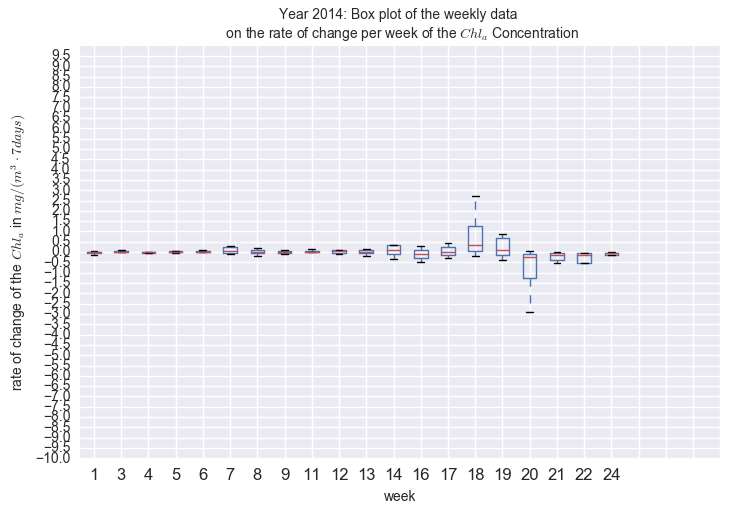


 summary statistics of chl_rate_week for the year 2015 

count    98.000000
mean      0.019596
std       3.101022
min     -21.651430
25%      -0.046124
50%       0.008014
75%       0.076202
max      16.909442
Name: chl_rate_week, dtype: float64


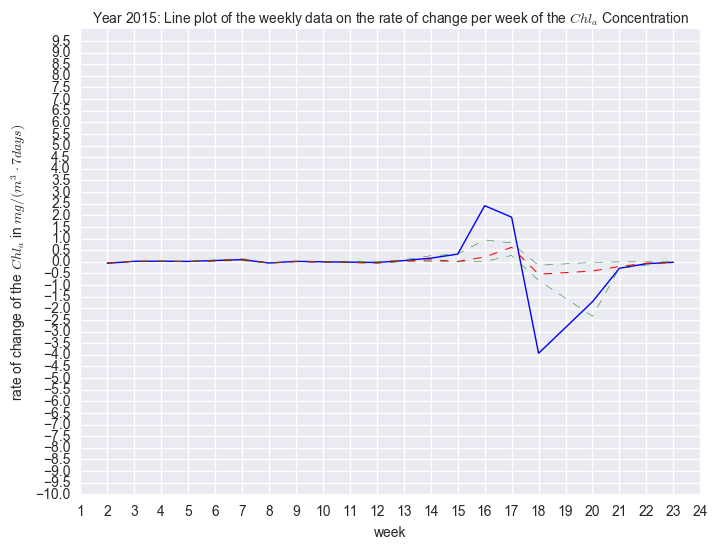

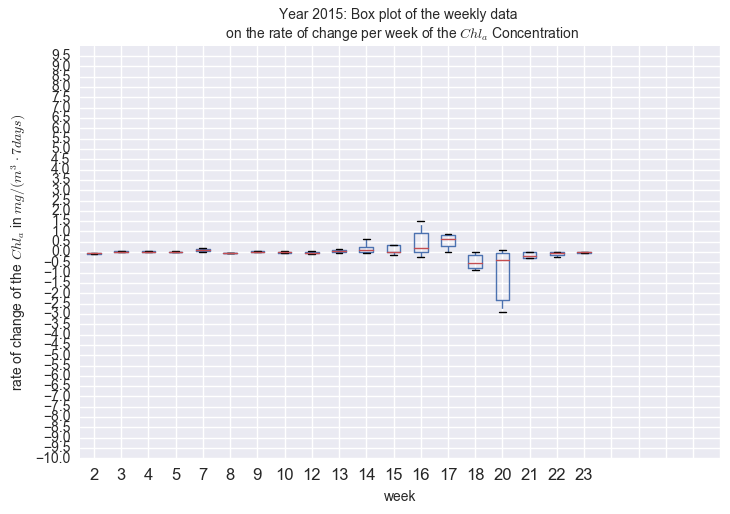


 summary statistics of chl_rate_week for the year 2016 

count    47.000000
mean     -0.005335
std       0.608121
min      -2.834149
25%      -0.039637
50%      -0.008139
75%       0.018232
max       2.801594
Name: chl_rate_week, dtype: float64


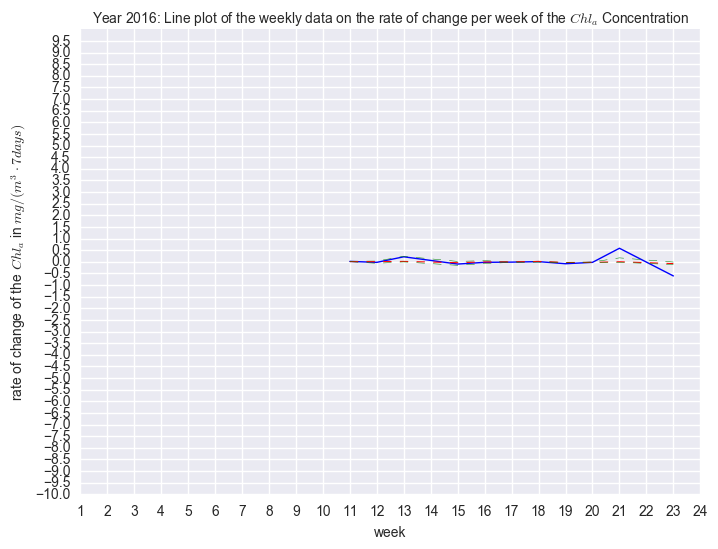

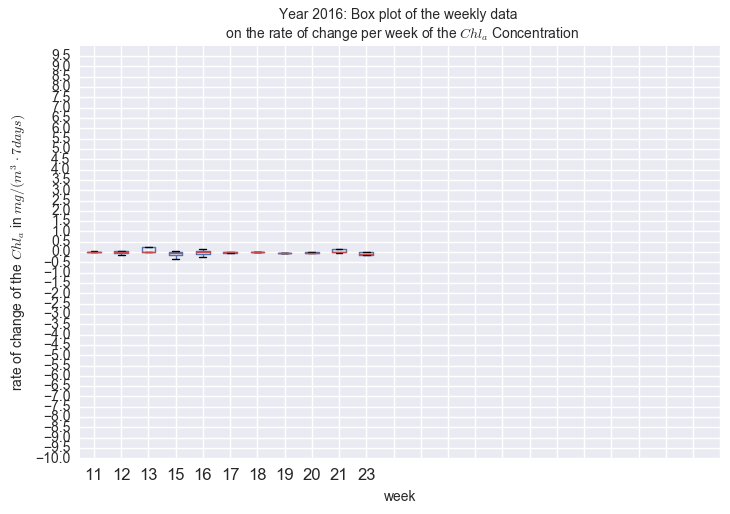

In [4]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(-10, 10)
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(-10, 10)
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()